In [1]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt

import load_ibw as li
import iterative_ecc as ecc
from glob import glob
import pickle
from PIL import Image

In /home/philippe/anaconda3/envs/hystorian_env2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/philippe/anaconda3/envs/hystorian_env2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/philippe/anaconda3/envs/hystorian_env2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/philippe/anaconda3/envs/hystorian_env2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be remove

In [2]:
# Get list of scanfiles to load
#filename = sorted(glob('/home/philippe/Documents/Xings/7th attempt asyelec/Zone1/macro_*.ibw'))
filename = sorted(glob('macro_*.ibw'))

In [3]:
# Exclude the last two files in the list, which are not part of the measurement series
filename

['macro_0000.ibw', 'macro_0020.ibw', 'macro_0032.ibw']

In [4]:
# Load reference topography image
z_ref = li.load_file(filename[0])['HeightRetrace']

# convert dtype to uint8
z_ref= ecc.to_gray(z_ref)

# Define grid of shifts to attempt if initial correction fails
xlist = list(np.arange(-150, 151, 50))
if 0 in xlist:
    xlist.remove(0)
shifts = []
for y in xlist:
    for x in xlist:
        shifts.append([y,x])
print(shifts)



[[-150, -150], [-150, -100], [-150, -50], [-150, 50], [-150, 100], [-150, 150], [-100, -150], [-100, -100], [-100, -50], [-100, 50], [-100, 100], [-100, 150], [-50, -150], [-50, -100], [-50, -50], [-50, 50], [-50, 100], [-50, 150], [50, -150], [50, -100], [50, -50], [50, 50], [50, 100], [50, 150], [100, -150], [100, -100], [100, -50], [100, 50], [100, 100], [100, 150], [150, -150], [150, -100], [150, -50], [150, 50], [150, 100], [150, 150]]


initial offset after correction: (-37.44144, 49.03506)
macro_0020.ibw


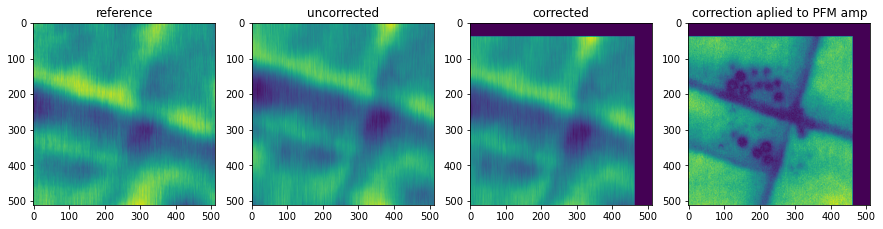

correction attempt from initial image coordinates failed
=== iteration 1 ===
best shift: (-58.38655, 81.14372)
Euclidean distance with last attempt: 99.96646
=== iteration 2 ===
best shift: (-58.38655, 81.14372)
Euclidean distance with last attempt: 0.00000
offset difference lower than threshold. Stopping now
macro_0032.ibw


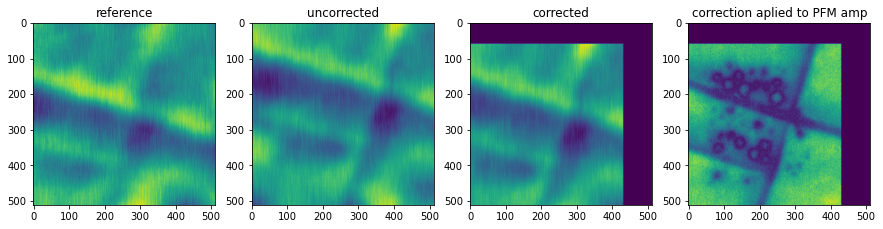

In [6]:
for i in range(1, len(filename)):
    
    # Load afm scan file
    scanfile = li.load_file(filename[i])
    # Load topography and PFM amplitude channels
    
    topo = scanfile['HeightRetrace']
    amp = scanfile['Amplitude1Retrace']
    # Convert topography and amplitude image dtype to uint8
    z_target = ecc.to_gray(topo)
    amp_target = ecc.to_gray(amp)
    
    # Apply correction 
    # F: error metric characterising the correction quality
    # z_corr: corrected topography
    # warp_matrix: correction matrix describing the transformation from z_target to z_corr
    F, z_corr, warp_matrix = ecc.get_warp_iterative_ecc(z_ref, z_target, shifts, 5, verbose=True)
    # Note: the first correction will work with simple ECC. Second will need iterative ECC to work
    
    # Apply warp matrix to amplitude image
    amp_corr = ecc.apply_warp(amp_target, warp_matrix)
    
    # Display result
    fig = plt.figure(figsize=(15,30))
    plt.subplot(141)
    plt.title('reference')
    plt.imshow(z_ref)
    plt.subplot(142)
    plt.title('uncorrected')
    plt.imshow(z_target)
    plt.subplot(143)
    plt.title('corrected')
    plt.imshow(z_corr)
    plt.subplot(144)
    plt.title('correction aplied to PFM amp')
    plt.imshow(amp_corr)
    plt.show()